In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
sub = pd.read_csv('./submission3.csv')
sub.drop(981, axis=0, inplace=True)
sub

,file_name,class,prediction
0,013ddVCiF0.jpg,ship,536 11 754 6 3136 1 3351 3 3381 4 3568 1 3596 ...
1,017LqtrIcn.jpg,ship,3297 5 3434 11 3572 15 3711 18 3850 20 3989 22...
2,01IWVfCAgM.jpg,ship,48216 8 48708 16 49200 23 49693 30 50186 37 50...
3,01JG3czzUQ.jpg,ship,39735 3 39983 12 40231 22 40481 31 40724 43 40...
4,01k2Nvf9O0.jpg,ship,16641 14 16683 6 16919 20 16955 16 17198 55 17...
...,...,...,...
8404,zyQV1kdrTO.jpg,ship,78679 6 79255 35 79834 44 80413 53 80993 57 81...
8405,zyng4w2wxJ.jpg,ship,30452 13 30805 26 31160 36 31518 40 31876 43 3...
8406,zz23hE2RUF.jpg,ship,67628 10 68095 13 68561 17 69026 21 69492 25 6...
8407,zzFUpJUoj7.jpg,ship,19964 10 20207 17 20452 21 20698 25 20945 27 2...


In [9]:
files = sub['file_name']
imgs = [plt.imread(f'./images/{file}') for file in files]

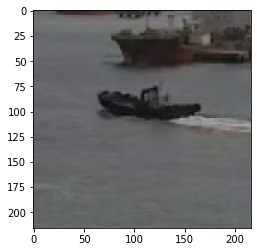

In [10]:
plt.imshow(imgs[0])

In [12]:
widths = [img.shape[0] for img in imgs]
heights = [img.shape[1] for img in imgs]

In [27]:
preds = sub['prediction'].values

points = []
windows = []

for pred in preds:
    point = [int(x) for x in pred.split(' ')[::2]]
    window = [int(x) for x in pred.split(' ')[1::2]]
    points.append(point)
    windows.append(window)

In [35]:
masks = []

for i, j, k, l in zip(widths, heights, points, windows):
    mask_flat = np.zeros(i * j)
    
    for m, n in zip(k, l):
        mask_flat[m:m+n] = 1
    
    mask_flat = mask_flat.reshape(i, j, 1)
    
    masks.append(mask_flat)

c:\workspace\pythonProject\venv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


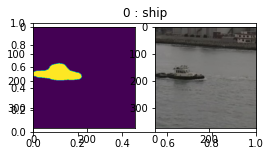

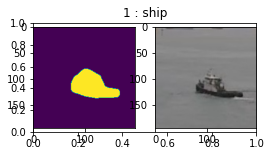

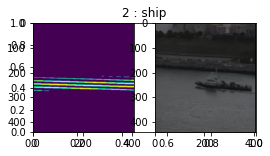

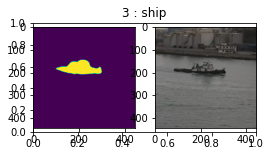

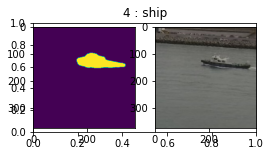

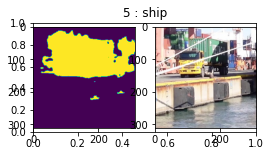

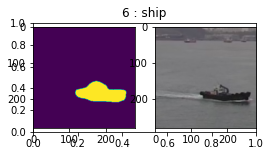

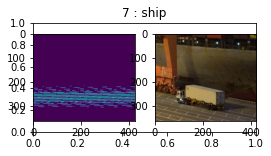

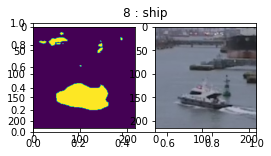

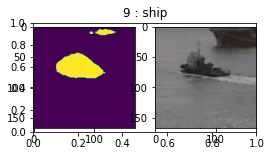

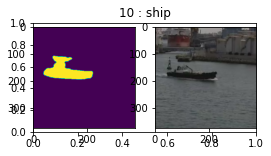

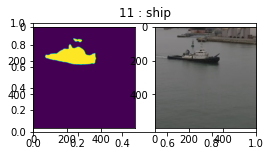

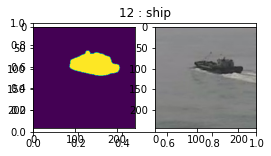

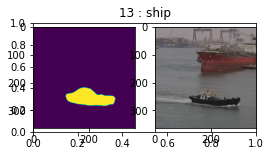

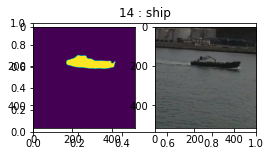

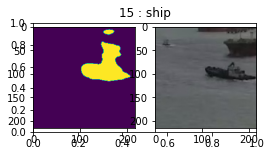

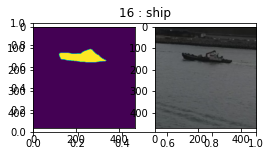

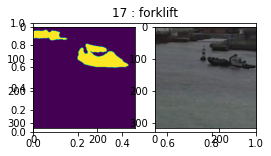

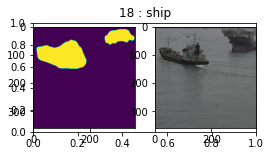

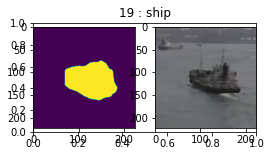

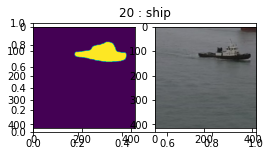

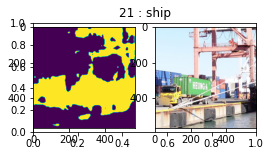

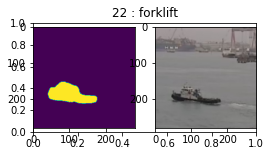

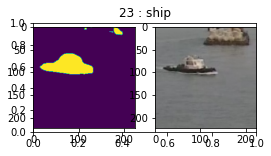

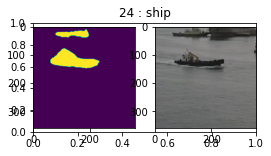

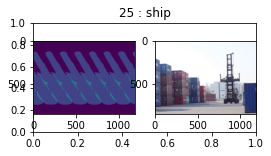

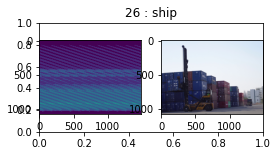

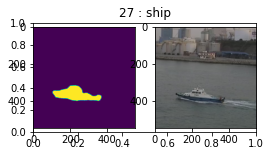

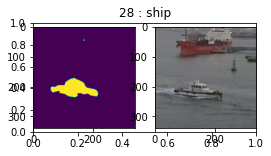

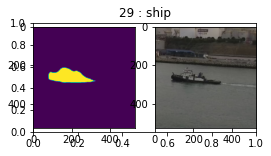

In [90]:
start, cnt = 5000, 30
for idx, label, img, mask in zip(sub.index, sub['class'],
                                 masks[start:start+cnt], 
                                 imgs[start:start+cnt]):
    fig = plt.figure(figsize=(4, 2))
    plt.title(f'{idx} : {label}')
    fig.add_subplot(1, 2, 1)
    plt.imshow(img)
    fig.add_subplot(1, 2, 2)
    plt.imshow(mask)